# Detección de elementos en imágenes

La detección de elementos consiste en la identificación de características de una imagen que responden a un patrón.

In [1]:
import cv2
import numpy as np
import cuia

## Detección de esquinas

Un esquina es un punto de la imagen en el que hay una transición abrupta en todas direcciones alrededor de dicho punto. Emplearemos la [detección de squinas de Harris](https://docs.opencv.org/4.x/dc/d0d/tutorial_py_features_harris.html) que combina la detección de vértices y aristas.

[**cornerHarris**(imagen. bloque , ksize, k)](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345)
* imagen en escala de grises en la que se buscarán esquinas
* bloque (tamaño de la vecindad de píxeles que se compararán)
* ksize (aperturas del operador de Sobel empleadop en el proceso)
* k (parámetro de la fórmula de detección de Harris)

El resultado es una imagen en la que cada píxel indica la intensidad con que se ha detectado una esquina.

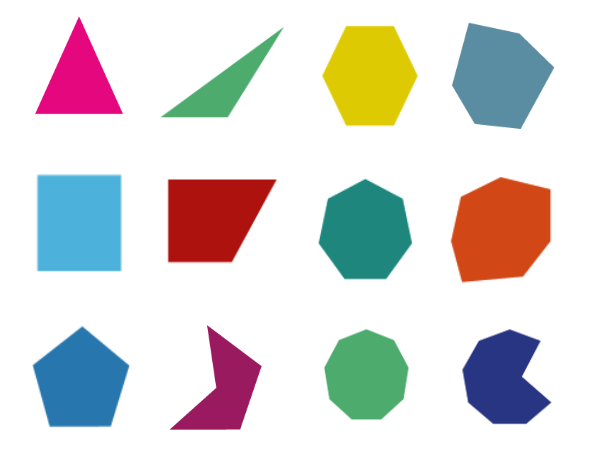

In [12]:
poligonos = cv2.imread("media/poligonos.png")
cuia.plot(poligonos)

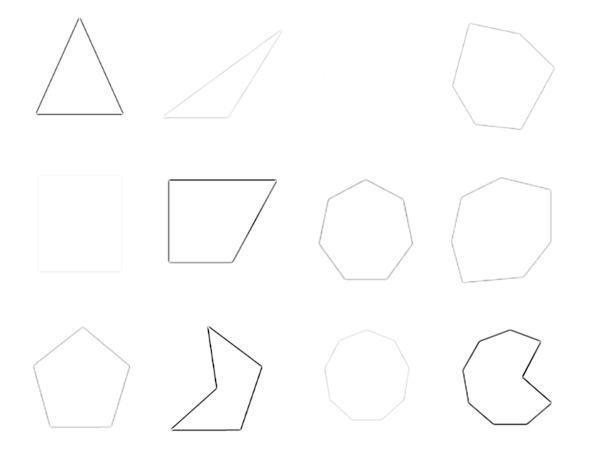

In [13]:
gris = cv2.cvtColor(poligonos, cv2.COLOR_BGR2GRAY)
res = cv2.cornerHarris(gris, 2, 3, 0.4)
cuia.plot(res)

Los parámetros son poco intuitivos y el resultado es necesario procesarlo en busca de los píxeles destacados.

La función [cv2.goodFeaturesToTrack](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541) implementa el algoritmo de Shi-Tomasi (una modificación al algoritmo de Harris) ofreciendo una lista de los mejores vértices detectados.

[**goodFeaturesToTrack**(imagen, maxCorners, qualityLevel, minDistance)](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)
* imagen en escala de grises donde se buscarán las esquinas
* maxCorners (número máximo de esquinas que se buscarán
* qualityLevel (umbral mínimo de calidad, relativo al mejor candidato)
* minDistance (distancia mínima entre los píxeles devueltos)

El valor devuelto es una lista con las coordenadas (como números reales) de las mejores esquinas detectadas.

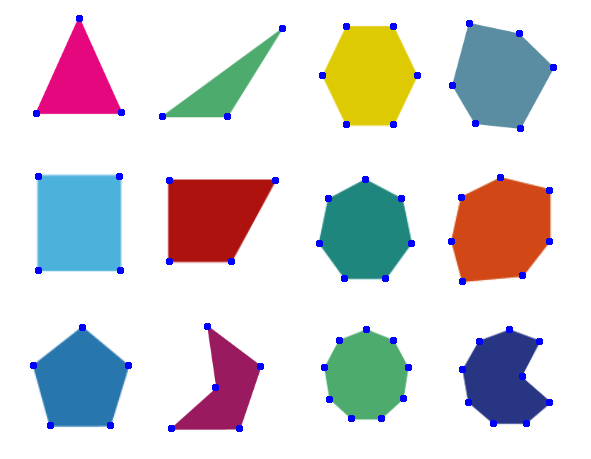

In [29]:
corners = cv2.goodFeaturesToTrack(gris, maxCorners=100, qualityLevel=0.01, minDistance=25)
imagen=poligonos.copy()
for c in corners:
    cv2.drawMarker(imagen, c[0].astype(int), (255,0,0), cv2.MARKER_STAR, 5, 2)
cuia.plot(imagen)

## Detección de círculos

La detección de círculos se realiza mediante una modificación de la [transformada de Hough](https://es.wikipedia.org/wiki/Transformada_de_Hough)

[**HoughCircles**( image, method, dp, minDist, param1, param2, minRadius, maxRadius)](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d)
* image (imagen en escala de grises)
* method (método a emplear, siendo las opciones cv2.HOUGH_GRADIENT y CV2.HOUGH_GRADIENT_ALT)
* dp (parámetro relativo a la resolución, su valor depende del método)
* minDist (distancia mínima entre los centros de  los círculos detectados para evitar detección múltiple del mismo círculo)
* param1 (parámetro que depende del método, por defecto 100)
* param2 (parámetro que depende del método, por defecto 100)
* minRadius (radio mínimo de los círculos detectados, por defecto 0)
* maxRadius (radio máximo de los círculos detectados, por defecto 0 --sin límite--)

In [31]:
snooker = cv2.imread("media/snooker.jpg")
gris = cv2.cvtColor(snooker, cv2.COLOR_BGR2GRAY)

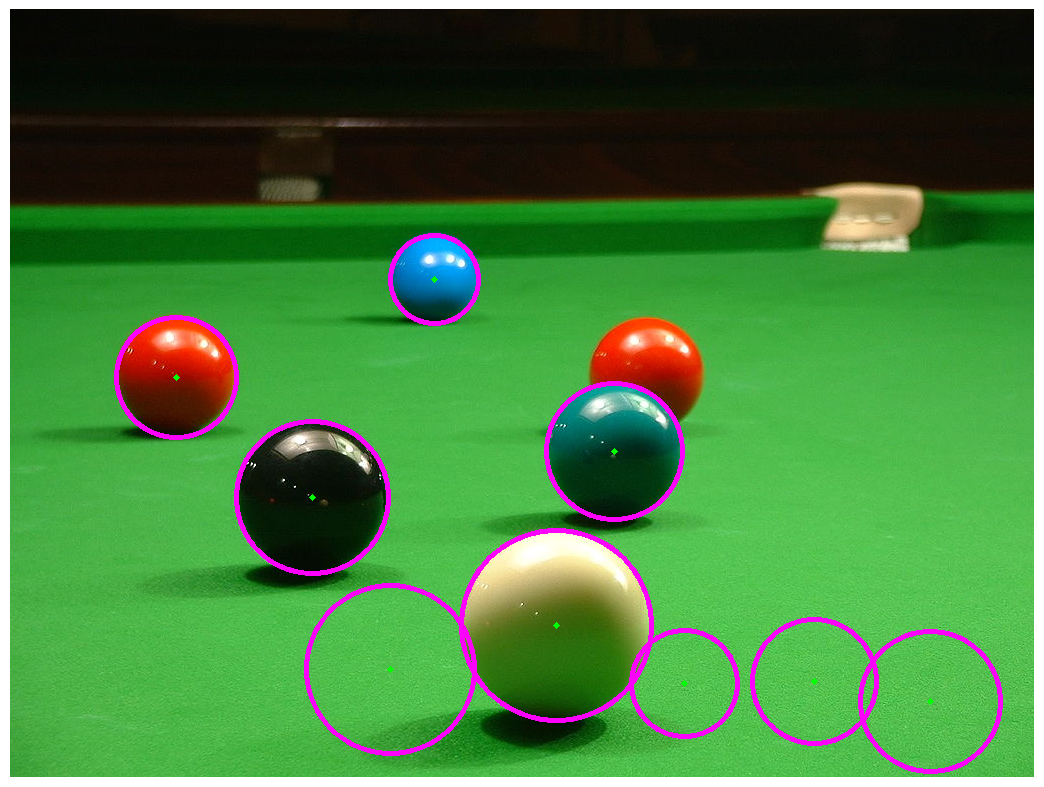

In [43]:
imagen = snooker.copy()
circulos = cv2.HoughCircles(gris, 
                           method = cv2.HOUGH_GRADIENT, 
                           dp = 1, 
                           minDist = 100,
                           param1=100, param2=30,
                           minRadius=30, maxRadius=100)
if circulos is not None:
    circulos = np.uint16(np.around(circulos))
    for i in circulos[0, :]:
        centro = (i[0], i[1])
        cv2.circle(imagen, centro, 1, (0,255,0), 3)
        radio = i[2]
        cv2.circle(imagen, centro, radio, (255, 0, 255), 3)
        
cuia.plot(imagen)

Podemos comprobar que es necesario ajustar los parámetros adecuadamente y que podemos obtener falsos positivos así como la no deteccióon de algunos elementos.